In [67]:
#this program computes the entropy vs U/(mu B) for the spin 1/2 paramagnet
#System has N spins total
#the goal is to show how the entropy changes with the excitation energy, compute the function T and 1/T

#numpy allows for most basic math, including complex numbers
import numpy as np
#pyplot is the 'default' choice for plotting in python
import matplotlib.pyplot as plt

from math import comb

#set the number of spins
nsp = 160

#initialize arrays with empty values to be filled in the loops below (entropy in units of k, energy in units of (mu B))
omega = np.empty(nsp+1)
entropy = np.empty(nsp+1)
energy = np.empty(nsp+1)
nup = np.empty(nsp+1)
#the energy and temperatures are calculated at the midpoint, T is in units of (mu B)/k, T^-1 is in units of k/(mu B)
energyh = np.empty(nsp)
temp = np.empty(nsp)
tempinv = np.empty(nsp)
#this will hold the large N calculation of T vs N_up
tempinvan = np.empty(nsp)

#first calculate the Omega and entropy for different number of spin up
iqu = 0
while iqu < nsp+1:
    energy[iqu] = (nsp - 2.0*iqu)*1.0
    omega[iqu] = comb(nsp,iqu)
    entropy[iqu] = np.log(omega[iqu])
    #increment q
    iqu += 1

#now do the difference of adjacent number of spins and define to be the temperature at the average of the two energies
iqu = 0
while iqu < nsp:
    tempinv[iqu] = (entropy[iqu+1]-entropy[iqu])/(energy[iqu+1]-energy[iqu])
    temp[iqu] = 1.0/tempinv[iqu]
    energyh[iqu] = 0.5*(energy[iqu+1]+energy[iqu])
    tempinvan[iqu] = 0.5*np.log((iqu+0.5)/(nsp-iqu-0.5))
    #increment q
    iqu += 1

#output the points (can comment out)
#iqu = 0
#while iqu < nsp+1:
#    print(iqu,'{:.3e}'.format(omega[iqu]),'{:.3e}'.format(entropy[iqu]),energy[iqu])
#    #increment q
#    iqu += 1
#

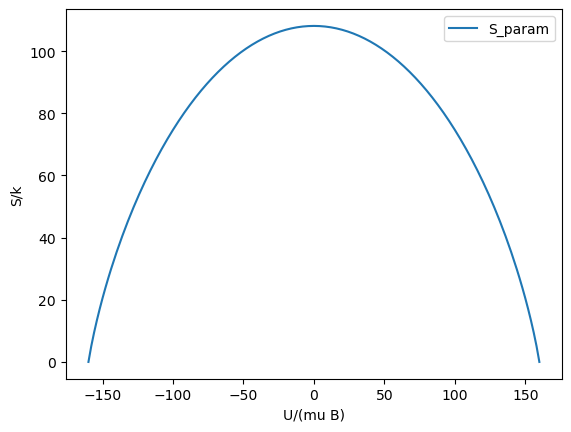

In [68]:
plt.plot(energy,entropy,label='S_param')
plt.legend()
plt.xlabel('U/(mu B)')
plt.ylabel('S/k')
plt.show()

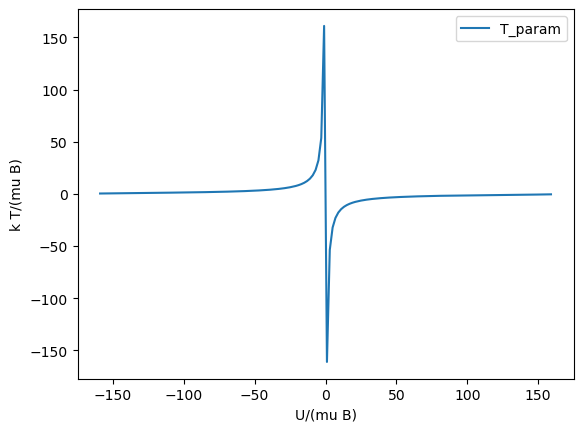

In [69]:
plt.plot(energyh,temp,label='T_param')
plt.legend()
plt.xlabel('U/(mu B)')
plt.ylabel('k T/(mu B)')
plt.show()

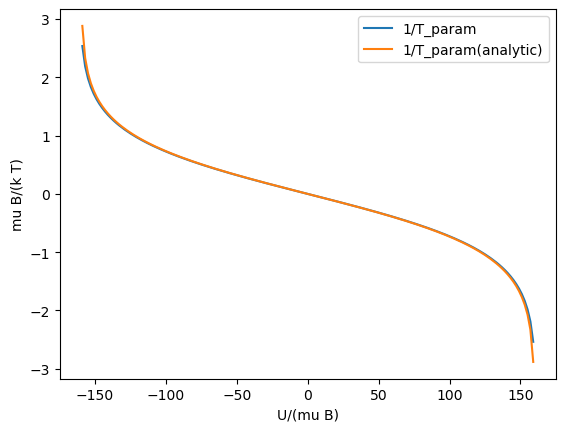

In [70]:
plt.plot(energyh,tempinv,label='1/T_param')
plt.plot(energyh,tempinvan,label='1/T_param(analytic)')
plt.legend()
plt.xlabel('U/(mu B)')
plt.ylabel('mu B/(k T)')
plt.show()